In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os.path import join

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.preprocessing import StandardScaler

directory = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
cambodia_file = r'Game Data\joinedDataCambodia.csv'
vietnam_file = r'Game Data\joinedDataVietnam.csv'
merged_file = r'Game Data\mergedData.csv'

sensitivity_folder=r'Sensitivity Analysis'
regression_folder=r'OLS Regression'

clusters_folder="Clusters"
subsidy_max=10

cambodia_csv = pd.read_csv(os.path.join(directory, cambodia_file), engine="python")
vietnam_csv = pd.read_csv(os.path.join(directory, vietnam_file), engine='python')
merged_csv = pd.read_csv(os.path.join(directory, merged_file), engine='python')

countries=['Vietnam', 'Cambodia']

metrics_title=['Income Per Patch',
 'Net Production Per Patch',
 'NCH Patches',
 'Non-HS Strategy',
 'Production Benefit Per NCH Patch',
 'Income Deviation',
 'HS Patches',
 'HS Strategy'
 ]

metrics=['Income Per Patch',
 'Net Production Per Patch',
 'NCH Patches (%)',
 'Non-HS Strategy (%)',
 'Production Benefit Per NCH Patch',
 'Income Deviation',
 'HS Patches (%)',
 'HS Strategy (%)']

metrics_extended =['Income Per Patch',
 'Net Production Per Patch',
 'NCH Patches',
 'Non-HS Strategy Adoption',
 'Production Benefit Per NCH Patch',
 'Income Deviation',
 'HS Patches',
 'Strategy Switches',
 'Switches to NCH Strategy',
 'Popular Strategy Adoption',
#  'HS Cells (Non-NCH Strategy)',
#  'HS Cells (NCH Strategy)',
 'NCH Patches (HS Strategy)',
 'NCH Patches (Non-HS Strategy)',
 'NCH Efficiency (HS Strategy)',
 'NCH Efficiency (Non-HS Strategy)',
 ]


metrics_extended_label =['Income Per Patch',
 'Net Production Per Patch',
 'NCH Patches (%)',
 'Non-HS Strategy Adoption (%)',
 'Production Benefit Per NCH Patch',
 'Income Deviation',
 'HS Patches (%)',
 'Strategy Switches',
 'Switches to NCH Strategy',
 'Popular Strategy Adoption (%)',
#  'HS Cells (Non-NCH Strategy)',
#  'HS Cells (NCH Strategy)',
 'NCH Patches (HS Strategy) (%)',
 'NCH Patches (Non-HS Strategy) (%)',
 'NCH Efficiency (HS Strategy)',
 'NCH Efficiency (Non-HS Strategy)',
 ]

set_percent_inds=[2, 3, 6, 9, 10, 11]

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
def to_percentage(x, pos):
    return f'{x * 100:.0f}%'
def to_percentage_decimal(x, pos):
    return f'{x * 100:.1f}%'

# data processing (needs to be run before generating figures)

In [2]:
df=pd.read_csv(join(directory, sensitivity_folder, 'heterogeneity_analysis.csv'))
df = df[df['sizeStdDev']>0]
df = df.reset_index(drop=True)
df=df.sort_values(by=['country', 'giniCoeff'], ascending=[False, True])
df=df.rename(columns={'numFarms': 'farmSize'})

data=dict()

country = "Vietnam"
data[country]=list()

x_ind=8

subsidy_max=10

ind=0
prev_ind=ind
while ind < len(df) and df['country'].iloc[ind+1]==country:
    ind+=1

full_list=df.iloc[prev_ind:ind+1, 9:-3].T
for i in range(len(full_list)):
    for j in range(len(full_list.columns)):
        full_list.iloc[i, j]=full_list.iloc[i, j][1:-1].split(" ")

for subsidy in range(subsidy_max+1):
    temp=full_list.copy()
    for i in range(len(full_list)):
        for j in range(len(full_list.columns)):
            temp.iloc[i, j]=float(full_list.iloc[i, j][subsidy])

    temp.columns=df.iloc[prev_ind:ind+1, x_ind].values
    temp.index=[_ for _ in range(len(temp))]
    temp=temp.sort_index(axis=1)
    data[country].append(temp)

country = "Cambodia"
data[country]=list()

ind+=1

full_list=df.iloc[ind:, 9:-3].T
for i in range(len(full_list)):
    for j in range(len(full_list.columns)):
        full_list.iloc[i, j]=full_list.iloc[i, j][1:-1].split(" ")

for subsidy in range(subsidy_max+1):
    temp=full_list.copy()
    for i in range(len(full_list)):
        for j in range(len(full_list.columns)):
            temp.iloc[i, j]=float(full_list.iloc[i, j][subsidy])

    temp.columns=df.iloc[ind:, x_ind].values
    temp.index=[_ for _ in range(len(temp))]
    temp=temp.sort_index(axis=1)
    data[country].append(temp)

# adjust font size for figures

In [3]:
plt.rcParams.update({'font.size': 16}) # label font size
title_size=18 # title font size
padding_title_size=20 # padding between title and rest of figure

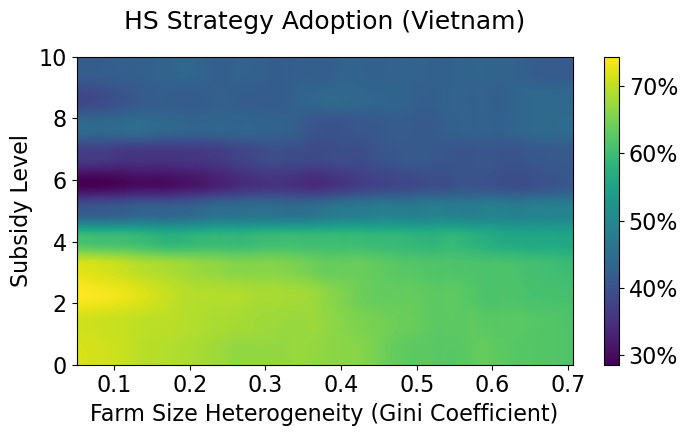

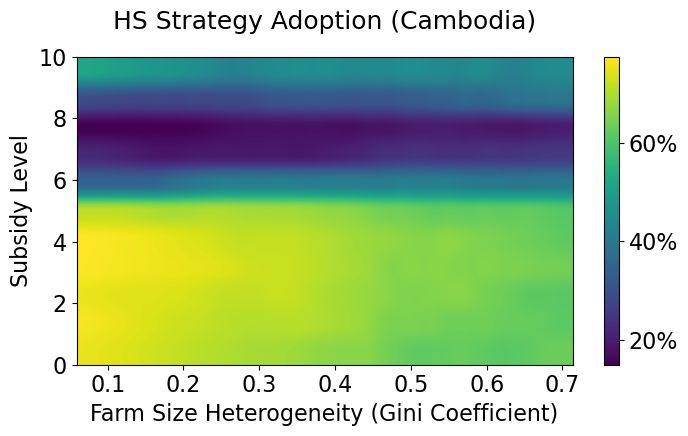

In [4]:
# HS strategy adoption
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt
subsidy_max=10

name='HS Strategy Adoption'

for country in countries:
    temp=pd.DataFrame(columns=data[country][-1].columns.astype('float64').tolist())
    for subsidy in range(subsidy_max+1):
        curr_data=1-data[country][subsidy].loc[3]
        temp.loc[subsidy]=curr_data.astype('float64').tolist()
    temp=temp.sort_index(axis=1)

    x = np.array(temp.columns)
    y = np.linspace(0, subsidy_max, subsidy_max+1)
    z = np.array(temp).transpose()

    x_flattened, y_flattened = np.meshgrid(x, y, indexing='ij')
    x_flattened = x_flattened.ravel()
    y_flattened = y_flattened.ravel()
    z_flattened = z.ravel()
    
    rbf = scipy.interpolate.Rbf(x_flattened, y_flattened, z_flattened, function='linear', smooth=5)

    xi = np.linspace(x.min(), x.max(), 1000)
    yi = np.linspace(y.min(), y.max(), 11)
    xi, yi = np.meshgrid(xi, yi)

    zi = rbf(xi, yi)

    plt.figure(figsize=[8,4])
    im=plt.imshow(zi, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', 
                  aspect='auto')
    cbar = plt.colorbar(im)
    plt.title(name +" ("+country+")", fontsize = title_size, pad=padding_title_size)
    plt.xlabel("Farm Size Heterogeneity (Gini Coefficient)")
    plt.ylabel("Subsidy Level")
    cbar.ax.yaxis.set_major_formatter(FuncFormatter(to_percentage))

    plt.savefig(join(directory, 'Figures', country+'_het_heatmaps', df.columns[x_ind], name+'.png'), dpi=600, bbox_inches='tight')

KeyboardInterrupt: 

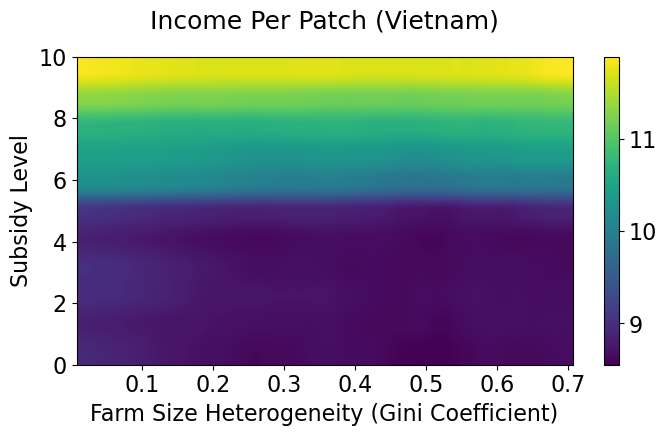

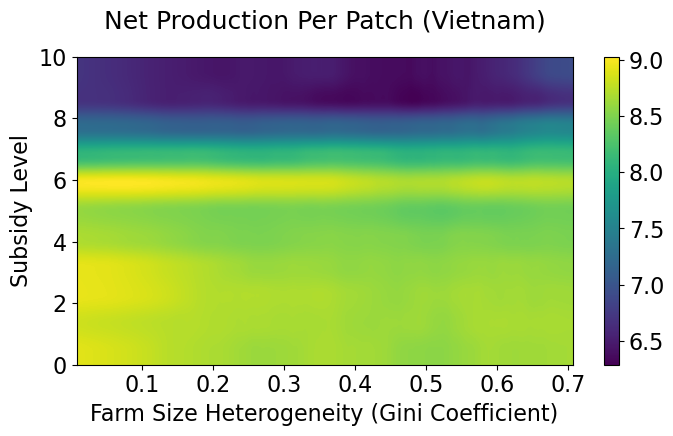

In [64]:
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

country = "Vietnam"

for i in range(len(metrics)):
    temp=pd.DataFrame(columns=data[country][-1].columns.astype('float64').tolist())
    for subsidy in range(subsidy_max+1):
        temp.loc[subsidy]=data[country][subsidy].loc[i].astype('float64').tolist()
    temp=temp.sort_index(axis=1)

    x = np.array(temp.columns)
    y = np.linspace(0, subsidy_max, subsidy_max+1)
    z = np.array(temp).transpose()

    x_flattened, y_flattened = np.meshgrid(x, y, indexing='ij')
    x_flattened = x_flattened.ravel()
    y_flattened = y_flattened.ravel()
    z_flattened = z.ravel()
    
    rbf = scipy.interpolate.Rbf(x_flattened, y_flattened, z_flattened, function='linear', smooth=5)

    xi = np.linspace(x.min(), x.max(), 1000)
    yi = np.linspace(y.min(), y.max(), 11)
    xi, yi = np.meshgrid(xi, yi)

    zi = rbf(xi, yi)

    plt.figure(figsize=[8,4])
    im=plt.imshow(zi, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', 
                  aspect='auto')
    cbar = plt.colorbar(im)
    plt.title(metrics_extended[i] +" ("+country+")", fontsize = title_size, pad=padding_title_size)
    plt.xlabel("Farm Size Heterogeneity (Gini Coefficient)")
    plt.ylabel("Subsidy Level")
    if i in set_percent_inds:
        cbar.ax.yaxis.set_major_formatter(FuncFormatter(to_percentage))

    plt.savefig(join(directory, 'Figures', country+'_het_heatmaps', df.columns[x_ind], metrics_extended[i]+'.png'), dpi=600, bbox_inches='tight')


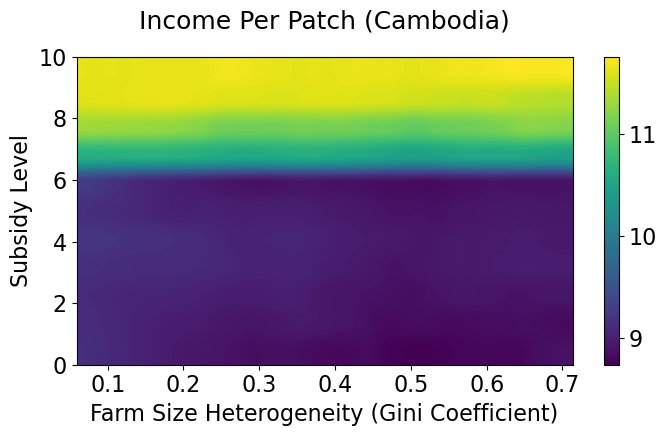

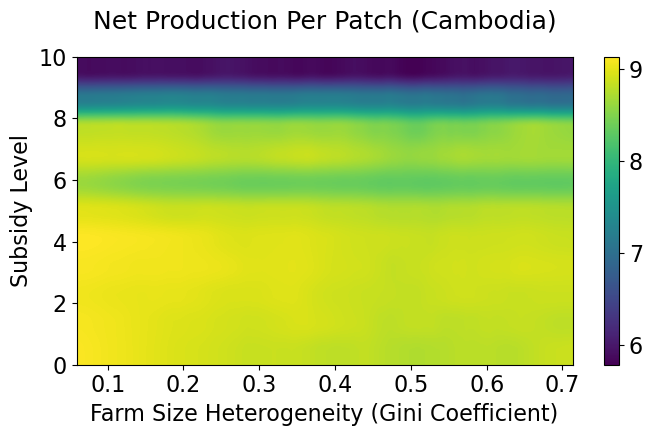

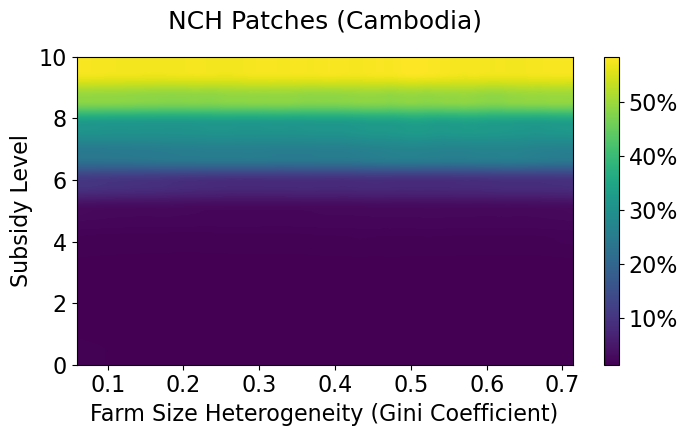

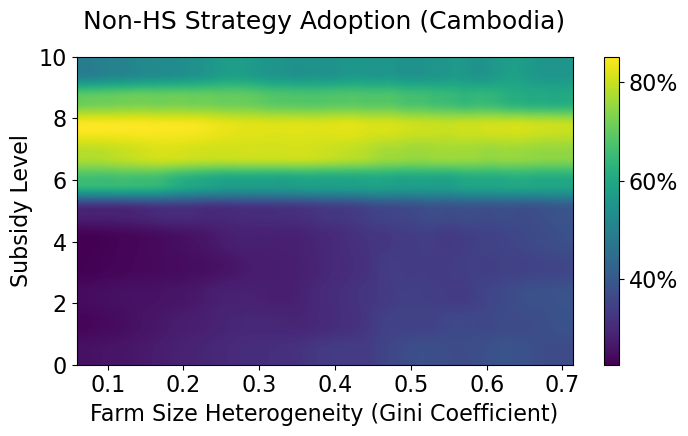

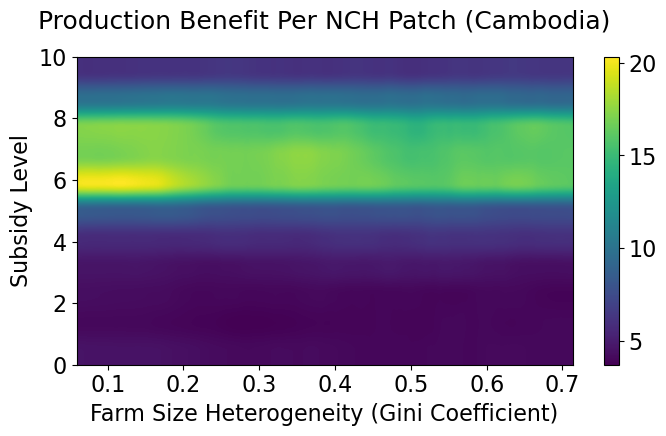

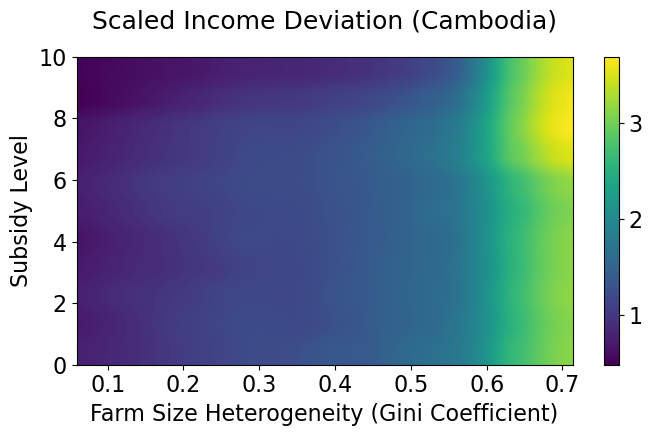

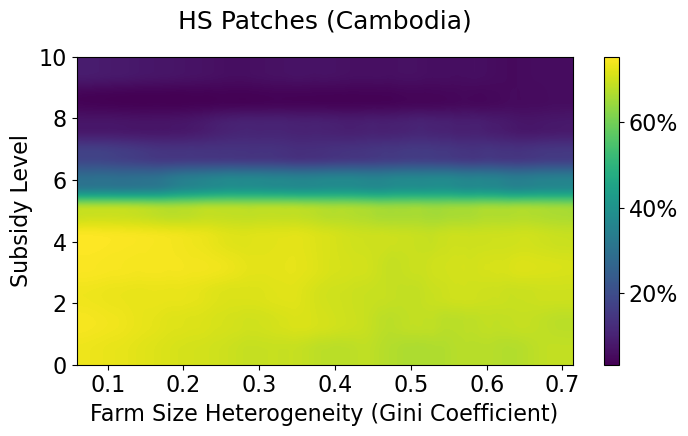

In [ ]:
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

country = "Cambodia"

for i in range(len(metrics)):
    temp=pd.DataFrame(columns=data[country][-1].columns.astype('float64').tolist())
    for subsidy in range(subsidy_max+1):
        temp.loc[subsidy]=data[country][subsidy].loc[i].astype('float64').tolist()
    temp=temp.sort_index(axis=1)

    x = np.array(temp.columns)
    y = np.linspace(0, subsidy_max, subsidy_max+1)
    z = np.array(temp).transpose()

    x_flattened, y_flattened = np.meshgrid(x, y, indexing='ij')
    x_flattened = x_flattened.ravel()
    y_flattened = y_flattened.ravel()
    z_flattened = z.ravel()
    
    rbf = scipy.interpolate.Rbf(x_flattened, y_flattened, z_flattened, function='linear', smooth=5)

    xi = np.linspace(x.min(), x.max(), 1000)
    yi = np.linspace(y.min(), y.max(), 11)
    xi, yi = np.meshgrid(xi, yi)

    zi = rbf(xi, yi)

    plt.figure(figsize=[8,4])
    im=plt.imshow(zi, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', 
                  aspect='auto')
    cbar = plt.colorbar(im)
    plt.title(metrics_extended[i] +" ("+country+")", fontsize = title_size, pad=padding_title_size)
    plt.xlabel("Farm Size Heterogeneity (Gini Coefficient)")
    plt.ylabel("Subsidy Level")
    if i in set_percent_inds:
        cbar.ax.yaxis.set_major_formatter(FuncFormatter(to_percentage))

    plt.savefig(join(directory, 'Figures', country+'_het_heatmaps', df.columns[x_ind], metrics_extended[i]+'.png'), dpi=600, bbox_inches='tight')


# HS patches figures from subsidy 0-5

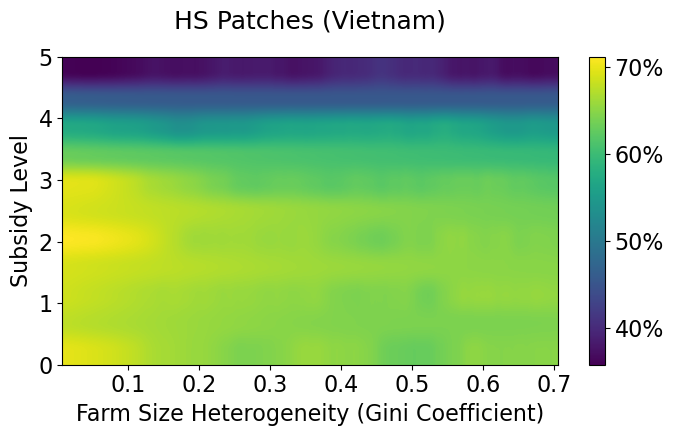

In [7]:
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt

subsidy_max=5

country = "Vietnam"

for i in [6]:
    temp=pd.DataFrame(columns=data[country][-1].columns.astype('float64').tolist())
    for subsidy in range(subsidy_max+1):
        temp.loc[subsidy]=data[country][subsidy].loc[i].astype('float64').tolist()
    temp=temp.sort_index(axis=1)

    x = np.array(temp.columns)
    y = np.linspace(0, subsidy_max, subsidy_max+1)
    z = np.array(temp).transpose()

    x_flattened, y_flattened = np.meshgrid(x, y, indexing='ij')
    x_flattened = x_flattened.ravel()
    y_flattened = y_flattened.ravel()
    z_flattened = z.ravel()
    
    rbf = scipy.interpolate.Rbf(x_flattened, y_flattened, z_flattened, function='linear', smooth=5)

    xi = np.linspace(x.min(), x.max(), 1000)
    yi = np.linspace(y.min(), y.max(), 11)
    xi, yi = np.meshgrid(xi, yi)

    zi = rbf(xi, yi)

    plt.figure(figsize=[8,4])
    im=plt.imshow(zi, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', 
                  aspect='auto')
    cbar = plt.colorbar(im)
    plt.title(metrics_extended[i] +" ("+country+")", fontsize = title_size, pad=padding_title_size)
    plt.xlabel("Farm Size Heterogeneity (Gini Coefficient)")
    plt.ylabel("Subsidy Level")
    if i in set_percent_inds:
        cbar.ax.yaxis.set_major_formatter(FuncFormatter(to_percentage))
    plt.savefig(join(directory, 'Figures', country+'_het_heatmaps', metrics[i]+'_0-5_subsidy.png'), dpi=600, bbox_inches='tight')

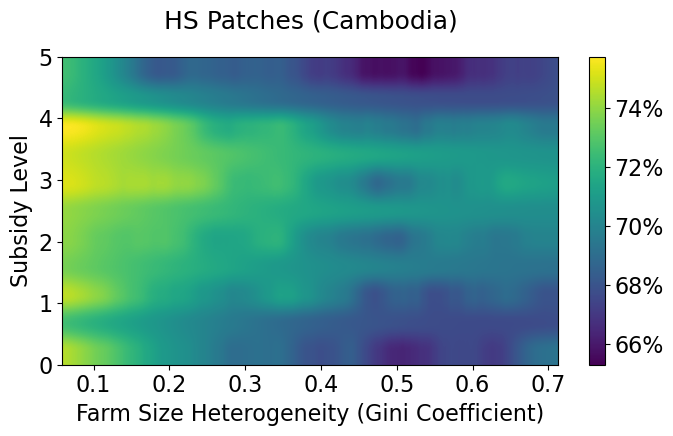

In [8]:

import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt

subsidy_max=5

country = "Cambodia"

for i in [6]:
    temp=pd.DataFrame(columns=data[country][-1].columns.astype('float64').tolist())
    for subsidy in range(subsidy_max+1):
        temp.loc[subsidy]=data[country][subsidy].loc[i].astype('float64').tolist()
    temp=temp.sort_index(axis=1)

    x = np.array(temp.columns)
    y = np.linspace(0, subsidy_max, subsidy_max+1)
    z = np.array(temp).transpose()

    x_flattened, y_flattened = np.meshgrid(x, y, indexing='ij')
    x_flattened = x_flattened.ravel()
    y_flattened = y_flattened.ravel()
    z_flattened = z.ravel()
    
    rbf = scipy.interpolate.Rbf(x_flattened, y_flattened, z_flattened, function='linear', smooth=5)

    xi = np.linspace(x.min(), x.max(), 1000)
    yi = np.linspace(y.min(), y.max(), 11)
    xi, yi = np.meshgrid(xi, yi)

    zi = rbf(xi, yi)

    plt.figure(figsize=[8,4])
    im=plt.imshow(zi, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', 
                  aspect='auto')
    cbar = plt.colorbar(im)
    plt.title(metrics_extended[i] +" ("+country+")", fontsize = title_size, pad=padding_title_size)
    plt.xlabel("Farm Size Heterogeneity (Gini Coefficient)")
    plt.ylabel("Subsidy Level")
    if i in set_percent_inds:
        cbar.ax.yaxis.set_major_formatter(FuncFormatter(to_percentage))
    plt.savefig(join(directory, 'Figures', country+'_het_heatmaps', metrics[i]+'_0-5_subsidy.png'), dpi=600, bbox_inches='tight')

# OLS regression analysis

In [13]:
df=pd.read_csv(join(directory, sensitivity_folder, 'heterogeneity_analysis.csv'))
df = df[df['sizeStdDev']>0]
df = df.reset_index(drop=True)
df=df.sort_values(by=['country', 'giniCoeff'], ascending=[False, True])

subsidy_max=10

ols_df=dict()
country = "Vietnam"
ols_df[country]=list()

temp=pd.DataFrame(columns=df.columns)
temp.insert(1, 'subsidy', [])
for subsidy in range(subsidy_max+1):
    ols_df[country].append(temp.copy())

start_ind = 0
for i in range(len(df)):
    temp=df.iloc[i, 9:].tolist()
    for j in range(len(temp)):
        temp[j]=temp[j][1:-1].split(" ")
    temp=np.array(temp).astype(float)

    for subsidy in range(subsidy_max+1):
        temp2=np.concatenate((np.array(df.iloc[i, :9]), temp[:, subsidy]))
        temp2=np.insert(temp2, 1, subsidy)
        ols_df[country][subsidy].loc[i]=temp2

    if df['country'][i+1]!=country:
        start_ind = i+1
        break

country = "Cambodia"
ols_df[country]=list()

temp=pd.DataFrame(columns=df.columns)
temp.insert(1, 'subsidy', [])
for subsidy in range(subsidy_max+1):
    ols_df[country].append(temp.copy())

for i in range(start_ind, len(df)):
    temp=df.iloc[i, 9:].tolist()
    for j in range(len(temp)):
        temp[j]=temp[j][1:-1].split(" ")
    temp=np.array(temp).astype(float)

    for subsidy in range(subsidy_max+1):
        temp2=np.concatenate((np.array(df.iloc[i, :9]), temp[:, subsidy]))
        temp2=np.insert(temp2, 1, subsidy)
        ols_df[country][subsidy].loc[i]=temp2


processed_df=pd.DataFrame(columns=ols_df[country][0].columns)
for country in countries:
    for subsidy in range(subsidy_max+1):
        processed_df=pd.concat([processed_df, ols_df[country][subsidy]])

In [14]:
import numpy as np
import statsmodels.api as sm

x_ind=9

scaler = StandardScaler()

results=dict()
country='Vietnam'
# df=ols_df[country]
results[country]=[list() for _ in range(3)]

addon=processed_df.columns.tolist().index("listFarmerScore")

df_copy=processed_df.copy()
ind = 0
while df_copy['country'].iloc[ind]==country:
    ind+=1
processed_df=df_copy[:ind]

for i in range(len(metrics)):
    print("\nMetric:", country, metrics_extended[i], sep=" ")
    outcome=np.array(processed_df.iloc[:, i+addon]).reshape(-1, 1)
    # outcome = np.array(data_subsidy[country][i]).reshape(-1, 1)
    outcome=scaler.fit_transform(outcome)

    # X = np.column_stack((np.ones(farm_size.size), farm_size, subsidy, farm_size * subsidy))
    X=processed_df.iloc[:, [1, x_ind]]
    X['subsidy*' + processed_df.columns[x_ind]]=processed_df.iloc[:, [1, x_ind]].prod(axis=1)
    for j in range(len(X.columns)):
        X.iloc[:, j]/=max(X.iloc[:, j])
        X.iloc[:, j]=X.iloc[:, j].values.reshape(-1, 1)
        # X.iloc[:, j]=scaler.fit_transform(X.iloc[:, j].values.reshape(-1, 1))
    X=sm.add_constant(X)

    # Fit the least squares regression model
    model = sm.OLS(outcome, X).fit()

    # Print the summary of the regression analysis
    print(model.summary())

    coefficients = model.params
    standard_errors = model.bse
    p_values = model.pvalues

    results[country][0].append(coefficients)
    results[country][1].append(standard_errors)
    results[country][2].append(p_values)

    results_as_html = model.summary().tables[1].as_html()
    results_df = pd.read_html(results_as_html, header=0, index_col=0)[0]

    # results_df.to_excel(join(directory, sensitivity_folder, "Clean Data", "Regression Tables", "heterogeneity_"+country+"_"+metrics_title[i]+".xlsx"))


country='Cambodia'
results[country]=[list() for _ in range(3)]

processed_df=df_copy[ind:]

for i in range(len(metrics)):
    print("\nMetric:", country, metrics_extended[i], sep=" ")
    outcome=np.array(processed_df.iloc[:, i+addon]).reshape(-1, 1)
    outcome=scaler.fit_transform(outcome)

    X=processed_df.iloc[:, [1, x_ind]]
    X['subsidy*' + processed_df.columns[x_ind]]=processed_df.iloc[:, [1, x_ind]].prod(axis=1)
    for j in range(len(X.columns)):
        X.iloc[:, j]/=max(X.iloc[:, j])
        X.iloc[:, j]=X.iloc[:, j].values.reshape(-1, 1)
    X=sm.add_constant(X)

    model = sm.OLS(outcome, X).fit()

    print(model.summary())

    coefficients = model.params
    standard_errors = model.bse
    p_values = model.pvalues

    results[country][0].append(coefficients)
    results[country][1].append(standard_errors)
    results[country][2].append(p_values)

    results_as_html = model.summary().tables[1].as_html()
    results_df = pd.read_html(results_as_html, header=0, index_col=0)[0]

    # results_df.to_excel(join(directory, sensitivity_folder, "Clean Data", "Regression Tables", "heterogeneity_"+country+"_"+metrics_title[i]+".xlsx"))


Metric: Vietnam Income Per Patch
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                 1.995e+04
Date:                Sat, 22 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:07:30   Log-Likelihood:                -15740.
No. Observations:               21087   AIC:                         3.149e+04
Df Residuals:                   21083   BIC:                         3.152e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
cons

In [15]:
vals=['S', 'H', 'HS']

store=[]

for country in ['Vietnam', 'Cambodia']:
    df=pd.DataFrame(columns=['Coefficient', 'Standard Error'])
    for i in range(len(results[country][0])):
        temp=[]
        for j in range(1, 4):
            coeff="{:.3f}".format(round(results[country][0][i][j], 3))
            p=round(results[country][2][i][j], 5)
            if p<0.01:
                coeff+="***"
            elif p<0.05:
                coeff+="**"
            elif p<0.1:
                coeff+="*"
            df.loc[metrics_extended[i]+' '+vals[j-1]]=[coeff, "{:.3f}".format(round(results[country][1][i][j], 3))]
    df.to_csv(join(directory, regression_folder, "formatted_het_"+country+".csv"))
    store.append(df)
store[0]

,Coefficient,Standard Error
Income Per Patch S,2.626***,0.046
Income Per Patch H,-0.116***,0.038
Income Per Patch HS,0.128**,0.062
Net Production Per Patch S,-2.365***,0.067
Net Production Per Patch H,-0.195***,0.055
Net Production Per Patch HS,0.335***,0.090
NCH Patches S,2.945***,0.038
NCH Patches H,0.031,0.031
NCH Patches HS,-0.100**,0.051
Non-HS Strategy Adoption S,2.498***,0.076


In [16]:
vals=['S', 'H', 'SH']

store=[]

for country in ['Vietnam', 'Cambodia']:
    df=pd.DataFrame(columns=['Coefficient', 'P-Value'])
    for i in range(len(results[country][0])):
        temp=[]
        for j in range(1, 4):
            df.loc[metrics_extended[i]+' '+vals[j-1]]=[round(results[country][0][i][j], 5), round(results[country][2][i][j], 5)]
    df.to_csv(join(directory, regression_folder, "precise_het_"+country+".csv"))

for country in ['Vietnam', 'Cambodia']:
    df=pd.DataFrame(columns=['Coefficient', 'P-Value'])
    for i in range(len(results[country][0])):
        temp=[]
        for j in range(1, 4):
            p=round(results[country][2][i][j], 5)
            if p<0.001:
                p='p<0.001'
            elif p<0.01:
                p='p<0.01'
            elif p<0.05:
                p='p<0.05'
            df.loc[metrics_extended[i]+' '+vals[j-1]]=[round(results[country][0][i][j], 5), p]
    df.to_csv(join(directory, regression_folder, "inequalities_het_"+country+".csv"))
    store.append(df)
store[0]

,Coefficient,P-Value
Income Per Patch S,2.62569,p<0.001
Income Per Patch H,-0.11551,p<0.01
Income Per Patch SH,0.12794,p<0.05
Net Production Per Patch S,-2.36511,p<0.001
Net Production Per Patch H,-0.19485,p<0.001
Net Production Per Patch SH,0.33474,p<0.001
NCH Patches S,2.94495,p<0.001
NCH Patches H,0.03081,0.3241
NCH Patches SH,-0.09955,p<0.05
Non-HS Strategy Adoption S,2.49774,p<0.001


# cleaning for Stata non-parametric regression

In [11]:
df=pd.read_csv(join(directory, sensitivity_folder, 'heterogeneity_analysis.csv'))
df = df[df['sizeStdDev']>0]
df = df.reset_index(drop=True)
df=df.sort_values(by=['country', 'giniCoeff'], ascending=[False, True])

subsidy_max=10

ols_df=dict()
country = "Vietnam"
ols_df[country]=list()

temp=pd.DataFrame(columns=df.columns)
temp.insert(1, 'subsidy', [])
for subsidy in range(subsidy_max+1):
    ols_df[country].append(temp.copy())

start_ind = 0
for i in range(len(df)):
    temp=df.iloc[i, 9:].tolist()
    for j in range(len(temp)):
        temp[j]=temp[j][1:-1].split(" ")
    temp=np.array(temp).astype(float)

    for subsidy in range(subsidy_max+1):
        temp2=np.concatenate((np.array(df.iloc[i, :9]), temp[:, subsidy]))
        temp2=np.insert(temp2, 1, subsidy)
        ols_df[country][subsidy].loc[i]=temp2

    if df['country'][i+1]!=country:
        start_ind = i+1
        break

country = "Cambodia"
ols_df[country]=list()

temp=pd.DataFrame(columns=df.columns)
temp.insert(1, 'subsidy', [])
for subsidy in range(subsidy_max+1):
    ols_df[country].append(temp.copy())

for i in range(start_ind, len(df)):
    temp=df.iloc[i, 9:].tolist()
    for j in range(len(temp)):
        temp[j]=temp[j][1:-1].split(" ")
    temp=np.array(temp).astype(float)

    for subsidy in range(subsidy_max+1):
        temp2=np.concatenate((np.array(df.iloc[i, :9]), temp[:, subsidy]))
        temp2=np.insert(temp2, 1, subsidy)
        ols_df[country][subsidy].loc[i]=temp2


processed_df=pd.DataFrame(columns=ols_df[country][0].columns)
for country in countries:
    for subsidy in range(subsidy_max+1):
        processed_df=pd.concat([processed_df, ols_df[country][subsidy]])

processed_df=processed_df.sort_values(by=['country', 'subsidy'], ascending=[False, True])

# adding calculation for HS strategy
processed_df.insert(17, 'listHSStrategy', 1-processed_df['listNCHStrategy'].astype('float64'))

In [12]:
processed_df

,country,subsidy,numFarms,heterogeneityIndex,sidelength,sizeStdDev,sizeRange,largestPlot,coeffVariation,giniCoeff,...,listNCHStrategy,listNCHBenefit,listDeviation,listHSCells,listHSStrategy,listStrategySwitches,listNCHSwitches,listPopularStrategy,listNCHBenefit_NonNCH,listNCHBenefit_NCH
0,Vietnam,0,9,0.0,15,3.122499,0.044444,0.12,0.1249,0.05037,...,0.495556,11.544135,1.781552,0.472178,0.504444,0.088889,0.042222,0.575556,1.758197,13.306437
1,Vietnam,0,8,0.0,15,3.440826,0.048889,0.137778,0.12234,0.051667,...,0.1375,3.035035,0.637303,0.818489,0.862500,0.085,0.0375,0.8775,1.689018,3.994762
2,Vietnam,0,4,0.15,15,6.946222,0.062222,0.275556,0.123488,0.056667,...,0.135,3.378262,0.41368,0.824622,0.865000,0.09,0.04,0.905,1.621538,4.373657
3,Vietnam,0,5,0.0,15,8.154753,0.088889,0.226667,0.181217,0.08,...,0.04,1.132964,0.115797,0.915644,0.960000,0.052,0.02,0.968,1.100154,1.129021
4,Vietnam,0,7,0.1,15,7.10466,0.102222,0.186667,0.221034,0.109206,...,0.185714,6.135256,0.439702,0.774311,0.814286,0.102857,0.045714,0.888571,2.281111,6.864145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,Cambodia,10,45,1.1,15,9.171321,0.164444,0.168889,1.834264,0.692938,...,0.133778,4.172855,5.962573,0.112533,0.866222,0.008889,0.003556,0.866222,8.914956,12.754991
3847,Cambodia,10,47,1.8,15,11.180795,0.284444,0.288889,2.335544,0.693333,...,0.257021,3.495466,4.843732,0.101511,0.742979,0.01617,0.008511,0.742979,4.795283,14.358331
3848,Cambodia,10,46,1.65,15,10.584922,0.231111,0.235556,2.164029,0.693913,...,0.822174,9.319209,5.539451,0.000889,0.177826,0.055217,0.033913,0.822174,22.133994,19.218507
3849,Cambodia,10,50,1.7,15,10.771012,0.262222,0.266667,2.393558,0.695822,...,0.7968,6.749463,5.997846,0.001244,0.203200,0.0316,0.0216,0.7968,18.000141,15.672567


In [13]:
col_list=processed_df.columns[:10].tolist()

# Stata column title need to be short and have no spaces
metrics_stata=['Income', 'Net_Prod', 'NCH_Patches', 'NCH_Strategy', 'NCH_Efficiency', 'Income_Dev', 'HS_Patches', 'HS_Strategy']

for i in metrics_stata:
    col_list.append(i)

processed_df=processed_df.iloc[:, :18]
processed_df.columns=col_list

In [14]:
selected_columns = processed_df.iloc[:, [1] + list(range(5, processed_df.shape[1]))]
selected_columns

,subsidy,sizeStdDev,sizeRange,largestPlot,coeffVariation,giniCoeff,Income,Net_Prod,NCH_Patches,NCH_Strategy,NCH_Efficiency,Income_Dev,HS_Patches,HS_Strategy
0,0,3.122499,0.044444,0.12,0.1249,0.05037,7.995022,7.995022,0.016,0.495556,11.544135,1.781552,0.472178,0.504444
1,0,3.440826,0.048889,0.137778,0.12234,0.051667,9.321244,9.321244,0.014489,0.1375,3.035035,0.637303,0.818489,0.862500
2,0,6.946222,0.062222,0.275556,0.123488,0.056667,9.3544,9.3544,0.013244,0.135,3.378262,0.41368,0.824622,0.865000
3,0,8.154753,0.088889,0.226667,0.181217,0.08,9.655556,9.655556,0.014311,0.04,1.132964,0.115797,0.915644,0.960000
4,0,7.10466,0.102222,0.186667,0.221034,0.109206,9.211822,9.211822,0.013689,0.185714,6.135256,0.439702,0.774311,0.814286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,10,9.171321,0.164444,0.168889,1.834264,0.692938,11.2424,5.182844,0.605956,0.133778,4.172855,5.962573,0.112533,0.866222
3847,10,11.180795,0.284444,0.288889,2.335544,0.693333,11.054489,4.642933,0.641156,0.257021,3.495466,4.843732,0.101511,0.742979
3848,10,10.584922,0.231111,0.235556,2.164029,0.693913,12.360267,7.257156,0.510311,0.822174,9.319209,5.539451,0.000889,0.177826
3849,10,10.771012,0.262222,0.266667,2.393558,0.695822,11.920178,6.076622,0.584356,0.7968,6.749463,5.997846,0.001244,0.203200


In [17]:
selected_columns[:start_ind*11+11].to_csv(join(directory, sensitivity_folder, "Clean Data", "heterogeneity_vietnam.csv"), index=False)

In [18]:
selected_columns[start_ind*11+11:].to_csv(join(directory, sensitivity_folder, "Clean Data", "heterogeneity_cambodia.csv"), index=False)

In [19]:
selected_columns.to_csv(join(directory, sensitivity_folder, "Clean Data", "heterogeneity.csv"), index=False)

# outputting scaled values for Stata non-parametric regression (which is what was used) to "Scaled" folder in "Clean Data" folder

In [20]:

scaler = StandardScaler()

for i in range(6):
    selected_columns.iloc[:, i]/=max(selected_columns.iloc[:, i])
for j in range(6, len(selected_columns.columns)):
    temp=selected_columns.iloc[:, j].values.reshape(-1, 1)
    temp=scaler.fit_transform(temp)
    selected_columns.iloc[:, j]=temp

In [21]:
selected_columns

,subsidy,sizeStdDev,sizeRange,largestPlot,coeffVariation,giniCoeff,Income,Net_Prod,NCH_Patches,NCH_Strategy,NCH_Efficiency,Income_Dev,HS_Patches,HS_Strategy
0,0.0,0.04823,0.067568,0.181208,0.049202,0.070613,-1.372304,-0.172557,-0.79823,0.032881,0.415756,0.147603,0.1997,-0.032881
1,0.0,0.053146,0.074324,0.208054,0.048194,0.07243,-0.292275,1.001366,-0.805501,-1.645186,-1.00142,-1.200942,1.401197,1.645186
2,0.0,0.10729,0.094595,0.416107,0.048646,0.079439,-0.265274,1.030714,-0.811489,-1.656903,-0.944256,-1.464492,1.422476,1.656903
3,0.0,0.125957,0.135135,0.342282,0.071387,0.11215,-0.020023,1.297286,-0.806356,-2.102131,-1.318207,-1.815559,1.73827,2.102131
4,0.0,0.109737,0.155405,0.281879,0.087073,0.153093,-0.381384,0.904509,-0.80935,-1.419225,-0.485084,-1.433823,1.247926,1.419225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,1.0,0.141659,0.25,0.255034,0.722579,0.971409,1.272248,-2.661794,2.040425,-1.662631,-0.811918,5.07511,-1.048056,1.662631
3847,1.0,0.172697,0.432432,0.436242,0.92005,0.971963,1.119219,-3.139704,2.209795,-1.085037,-0.924736,3.756509,-1.086296,1.085037
3848,1.0,0.163493,0.351351,0.355705,0.852485,0.972775,2.182599,-0.82569,1.580218,1.563614,0.045198,4.576443,-1.435397,-1.563614
3849,1.0,0.166367,0.398649,0.402685,0.942904,0.975452,1.824206,-1.870655,1.936494,1.444696,-0.382789,5.11668,-1.434163,-1.444696


In [22]:
selected_columns[:start_ind*11+11].to_csv(join(directory, sensitivity_folder, "Clean Data", "Scaled", "heterogeneity_vietnam_scaled.csv"), index=False)

In [23]:
selected_columns[start_ind*11+11:].to_csv(join(directory, sensitivity_folder, "Clean Data", "Scaled", "heterogeneity_cambodia_scaled.csv"), index=False)

In [24]:
selected_columns.to_csv(join(directory, sensitivity_folder, "Clean Data", "Scaled", "heterogeneity_scaled.csv"), index=False)

# trimming out disconnected range for regression analysis

In [25]:
trimmed_vietnam=pd.read_csv(join(directory, sensitivity_folder, "Clean Data", "Scaled", "heterogeneity_vietnam_scaled.csv"))
trimmed_vietnam=trimmed_vietnam[trimmed_vietnam['subsidy']<=0.7]
trimmed_vietnam.to_csv(join(directory, sensitivity_folder, "Clean Data", "Scaled_trimmed", "heterogeneity_vietnam_scaled.csv"), index=False)

trimmed_cambodia=pd.read_csv(join(directory, sensitivity_folder, "Clean Data", "Scaled", "heterogeneity_cambodia_scaled.csv"))
trimmed_cambodia=trimmed_cambodia[trimmed_cambodia['subsidy']<=0.8]
trimmed_cambodia.to_csv(join(directory, sensitivity_folder, "Clean Data", "Scaled_trimmed", "heterogeneity_cambodia_scaled.csv"), index=False)

# OLS regression analysis (trimmed)

In [10]:
pd.read_csv(join(directory, sensitivity_folder, 'Clean Data', 'Scaled_trimmed', 'heterogeneity_'+country.lower()+'_scaled.csv'))

,subsidy,sizeStdDev,sizeRange,largestPlot,coeffVariation,giniCoeff,Income,Net_Prod,NCH_Patches,NCH_Strategy,NCH_Efficiency,Income_Dev,HS_Patches,HS_Strategy
0,0.0,0.115155,0.114865,0.449664,0.052212,0.082555,-0.357569,0.930396,-0.805928,-1.164809,-0.333461,-1.667241,1.188714,1.164809
1,0.0,0.134875,0.128378,0.422819,0.061153,0.098131,-0.156040,1.149444,-0.804218,-1.797501,-1.164202,-1.632492,1.543982,1.797501
2,0.0,0.110305,0.135135,0.362416,0.062517,0.102181,-0.337445,0.952269,-0.808067,-1.352273,-0.378956,-1.569463,1.233431,1.352273
3,0.0,0.108121,0.121622,0.348993,0.061279,0.104673,-0.416058,0.866821,-0.804645,-1.333527,-0.859168,-1.085097,1.196732,1.333527
4,0.0,0.160208,0.168919,0.456376,0.072640,0.123053,-0.241965,1.056049,-0.802507,-1.703769,-1.105198,-1.462556,1.437279,1.703769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17338,0.8,0.141659,0.250000,0.255034,0.722579,0.971409,0.891921,-0.456518,0.989990,1.490938,0.229444,4.574423,-1.107575,-1.490938
17339,0.8,0.172697,0.432432,0.436242,0.920050,0.971963,1.494189,0.982404,0.457074,1.459693,1.580308,4.612652,-1.295078,-1.459693
17340,0.8,0.163493,0.351351,0.355705,0.852485,0.972775,0.742512,-0.574854,0.960051,1.282417,-0.019360,3.719275,-0.691246,-1.282417
17341,0.8,0.166367,0.398649,0.402685,0.942904,0.975452,1.431719,1.132921,0.308662,1.335967,2.077686,5.181317,-1.293536,-1.335967


In [6]:
import numpy as np
import statsmodels.api as sm

x_ind=5
results=dict()

for country in countries:
    results[country]=[list() for _ in range(3)]
    df=pd.read_csv(join(directory, sensitivity_folder, 'Clean Data', 'Scaled_trimmed', 'heterogeneity_'+country.lower()+'_scaled.csv'))
    for i in range(len(metrics)):
        X=df.iloc[:, [0, x_ind]]
        X[df.columns[x_ind]+'*subsidy']=df.iloc[:, [0, x_ind]].prod(axis=1)
        X=sm.add_constant(X)
        model = sm.OLS(df.iloc[:, i+2], X).fit()
        
        print()
        print('Metric: ', metrics[i], ', ', country)
        print(model.summary())

        coefficients = model.params
        standard_errors = model.bse
        p_values = model.pvalues

        results[country][0].append(coefficients)
        results[country][1].append(standard_errors)
        results[country][2].append(p_values)

        results_as_html = model.summary().tables[1].as_html()
        results_df = pd.read_html(results_as_html, header=0, index_col=0)[0]

        results_df.to_excel(join(directory, sensitivity_folder, "Clean Data", "Regression Tables", "heterogeneity_"+country+"_"+metrics_title[i]+".xlsx"))


Metric:  Income Per Patch ,  Vietnam
                            OLS Regression Results                            
Dep. Variable:              sizeRange   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     995.9
Date:                Sat, 05 Oct 2024   Prob (F-statistic):               0.00
Time:                        01:02:49   Log-Likelihood:                 9246.3
No. Observations:               15392   AIC:                        -1.848e+04
Df Residuals:                   15388   BIC:                        -1.845e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------


In [3]:
# outputting OLS values formatted to * p-value format
vals=['S', 'F', 'FS']

store=[]

for country in ['Vietnam', 'Cambodia']:
    df=pd.DataFrame(columns=metrics)
    for i in range(len(results[country][0])):
        temp=[]
        for j in range(1, 4):
            coeff="{:.3f}".format(round(results[country][0][i][j], 3))
            p=round(results[country][2][i][j], 5)
            if p>0.001:
                coeff+='ns'
            temp.append(coeff)
            temp.append('('+str("{:.3f}".format(round(results[country][1][i][j], 3)))+')')
        df[metrics[i]]=temp
    df = df.astype(str)
    df.to_csv(join(directory, regression_folder, "formatted_heterogeneity_"+country+".csv"))
    store.append(df)
store[0]

,Income Per Patch,Net Production Per Patch,NCH Patches (%),Non-HS Strategy (%),Production Benefit Per NCH Patch,Income Deviation,HS Patches (%),HS Strategy (%)
0,-0.000ns,-0.000ns,-0.000ns,-0.000,1.776,-0.310,1.733,3.241
1,(0.020),(0.021),(0.013),(0.000),(0.070),(0.062),(0.045),(0.093)
2,0.346,0.284,0.883,1.000,-0.077ns,-0.062ns,-0.021ns,0.810
3,(0.012),(0.012),(0.008),(0.000),(0.041),(0.037),(0.027),(0.055)
4,0.000ns,0.000ns,0.000ns,0.000ns,-0.009ns,-0.122ns,0.096ns,-1.888
5,(0.028),(0.029),(0.018),(0.000),(0.099),(0.087),(0.064),(0.132)
